## Business Objective:
    
A bakery in France struggles to produce the right amount of products each day. Food wastage is high and they want to reduce the amount of food wastage along with the monetary loss that happens along with it.
We, know that weather affects the sales, and hence we have incorparated weather data with the sales data to create a forecasting model w.r.t the total sales that would happen in next 30 days.

The objective here is to help the bakery with data analysis and forecasting model so that they understand how food wastage can be handled.

To help the bakery reduce food wastage and financial losses through improved forecasting, we need to follow a structured approach involving data analysis and the creation of a forecasting model. Here’s a detailed plan to achieve this:

### Step 1: Data Analysis for Business Insights

1. **Data Collection and Preparation**
    - **Sales Data**: Gather historical daily sales data for various products.
    - **Weather Data**: Collect historical weather data for the same periods as the sales data.

2. **Exploratory Data Analysis (EDA)**
    - **Descriptive Statistics**: Compute mean, median, standard deviation, and other relevant statistics for sales and weather data.
    - **Data Visualization**: Create plots to identify trends, seasonality, and outliers.
        - Time series plots showing daily sales.
        - Scatter plots to examine the relationship between weather variables (like temperature and rainfall) and sales.
        - Histograms to analyze the distribution of sales data.
        
### Step 2: Modeling

1. **Sales forecastig**: Regression model is created by combining both the datasets and later on forecasting sales for the next 30 days.
2. **Model Evaluation**: Evaluating model on different metrics like R2, RMSE,time series plots etc.


## Data Understanding:
    
We have two dataset available for the task which helps to get better understanding of the sales.
To develop a forecasting model that helps the bakery manage food wastage and reduce monetary loss, we need to use the available datasets effectively. The sales data provides insights into the dynamics of product sales, while the weather data helps us understand the external factors influencing sales. Here’s a step-by-step plan:

- **Sales Data**: Contains columns for date, time, article, quantity, and unit price, which helps in understanding the sales dynamics for each product.
- **Weather Data**: Contains columns for date, average temperature (tavg), minimum temperature (tmin), maximum temperature (tmax), precipitation (prcp), snow, wind direction (wdir), wind speed (wspd), wind gust peak (wpgt), pressure (pres), and sunshine duration (tsun), providing weather elements for each date.



In [64]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, message=".*DataConversionWarning.*")

# Load datasets
sales = pd.read_csv('/Users/sarahmoin/Downloads/TaskA/bakery_sales_2021-2022.csv')
weather = pd.read_csv('/Users/sarahmoin/Downloads/TaskA/weather_2021.01.01-2022.10.31.csv')
print('Shape of the sales data:', sales.shape)
print('Shape of the weather data:', weather.shape)

Shape of the sales data: (234005, 7)
Shape of the weather data: (669, 11)


In [65]:
sales.head()

,Unnamed: 0,date,time,ticket_number,Article,Quantity,UNIT_PRICE
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [66]:
weather.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-01-01,2.7,1.5,5.7,15.2,NaN,335.0,15.5,31.0,1008.6,NaN
1,2021-01-02,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
2,2021-01-03,0.7,-0.3,1.6,0.0,NaN,327.0,17.1,38.9,1012.1,NaN
3,2021-01-04,0.0,-1.0,1.1,0.0,NaN,329.0,10.6,30.0,1011.4,NaN
4,2021-01-05,0.8,-0.9,2.1,0.0,NaN,338.0,6.2,30.0,1012.1,NaN


## Data Preparation

### Steps for Creating the Best Forecasting Model: 

1. **Data Cleaning**
    - Handle missing values, duplicates, and outliers in both datasets.
    - Convert date columns to appropriate date formats and ensure data alignment between the two datasets.

2. **Data Visualization**
    - Use plots to gain insights into sales trends and patterns.
    - Create visualizations to explore the relationship between weather elements and sales.
        - Time series plots for daily sales.
        - Scatter plots to show how weather factors (temperature, precipitation, etc.) affect sales.
        - Histograms to analyze the distribution of sales quantities.

3. **Data Engineering**
    - Combine sales and weather data based on the date to create a unified dataset.
    - Generate new features that might improve the model’s accuracy, such as moving averages of sales, lagged weather variables, and interaction terms.
    - Normalize or scale the data if necessary to improve model performance.

Following these steps will help in understanding the sales patterns better and in building a robust forecasting model to predict future sales, ultimately aiding in reducing food wastage and monetary losses.


**Data Cleaning**

Convert the date column to date time from both the dataset.

In [67]:
# Convert date columns to datetime format
sales['date'] = pd.to_datetime(sales['date'])
weather['date'] = pd.to_datetime(weather['date'])


Cleaning the Unit price column: 
1. Remove the € sig from the column
2. Remove the ',' sign.
3. Convert string to float.

In [68]:
sales['UNIT_PRICE'] = sales['UNIT_PRICE'].str.replace('€', '')
sales['UNIT_PRICE'] = sales['UNIT_PRICE'].str.replace(',', '.')
sales['UNIT_PRICE'] = sales['UNIT_PRICE'].astype(float)
sales

,Unnamed: 0,date,time,ticket_number,Article,Quantity,UNIT_PRICE
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,0.15
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,0.15
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30


We see that some quatity values are negative which is not possible.So, we are converting negative values to positive since a quantity cannot be negative. Also, removing those values is not possible here since the dataset is small.

In [69]:
sales.Quantity.unique()

array([   1.,    3.,    2.,    5.,    6.,    4.,   10.,   -1.,    8.,
          7.,   -4.,   -2.,   20.,    9.,   -3.,   -6.,   11.,   12.,
         -5.,   -9.,   13.,  -13.,  -12.,  -10.,  200., -200.,   15.,
         17.,   18.,   25.,   14.,  -17.,  -18.,   55.,   21.,   43.,
         16.,   -7.,   -8.,   50.])

In [70]:
sales['Quantity'] = np.where(sales['Quantity']<0,-(sales['Quantity']),sales['Quantity'])
sales['Quantity'].astype(float)

0         1.0
1         3.0
2         2.0
3         1.0
4         5.0
         ... 
234000    1.0
234001    1.0
234002    2.0
234003    1.0
234004    1.0
Name: Quantity, Length: 234005, dtype: float64

In [71]:
# Calculate total sales by multiplying Quantity and UNIT_PRICE for each entry
sales['Total_sales(€)'] = np.where(sales['Quantity']<0,-(sales['Quantity'] * sales['UNIT_PRICE']),sales['Quantity'] * sales['UNIT_PRICE'])
sales

,Unnamed: 0,date,time,ticket_number,Article,Quantity,UNIT_PRICE,Total_sales(€)
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2.40
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,6.00
...,...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,0.15,0.15
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20,1.20
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,0.15,0.30
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30,1.30


In [72]:
# Merge sales and weather data on 'Date'
salesWeather = pd.merge(sales, weather, on='date', how='inner')
salesWeather

,Unnamed: 0,date,time,ticket_number,Article,Quantity,UNIT_PRICE,Total_sales(€),tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,0.90,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,3.60,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2.40,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,1.15,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,6.00,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,0.15,0.15,10.2,7.0,14.6,0.0,NaN,346.0,9.9,40.8,1011.7,NaN
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20,1.20,10.2,7.0,14.6,0.0,NaN,346.0,9.9,40.8,1011.7,NaN
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,0.15,0.30,10.2,7.0,14.6,0.0,NaN,346.0,9.9,40.8,1011.7,NaN
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30,1.30,10.2,7.0,14.6,0.0,NaN,346.0,9.9,40.8,1011.7,NaN


**Data Visualisation**

### Temperature vs. Total_sales(€)

As we can see for the graph, sales is mostly consistent with the temperature. But in few instace like temperature between 5 degree C to 25 degree celcius sales rose to 125€ and even to 200€.
Also, we can see that no sale is happening around the temperatre of 30 degree celcius.

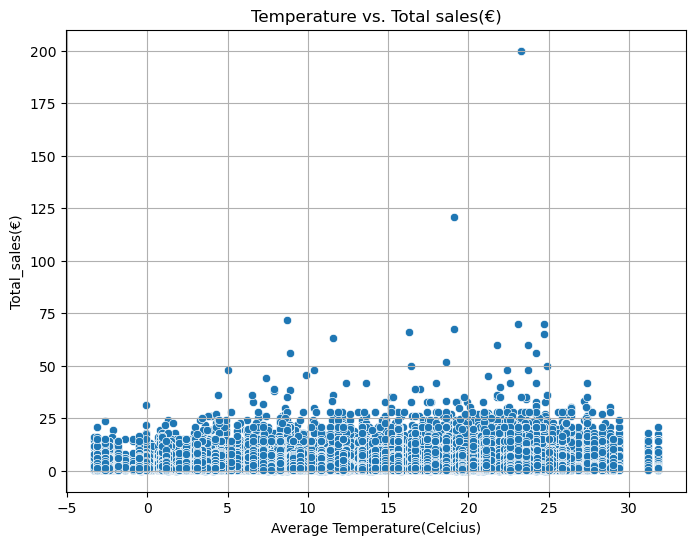

In [73]:
# Scatter plot for temperature vs. sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tavg', y='Total_sales(€)', data=salesWeather)
plt.title('Temperature vs. Total sales(€)')
plt.xlabel('Average Temperature(Celcius)')
plt.ylabel('Total_sales(€)')
plt.grid(True)
plt.show()


### Precipitation vs. Total_sales(€):

Maximum sale is happening around the precipitation of 0 -10 which is during the time of less rainfall.

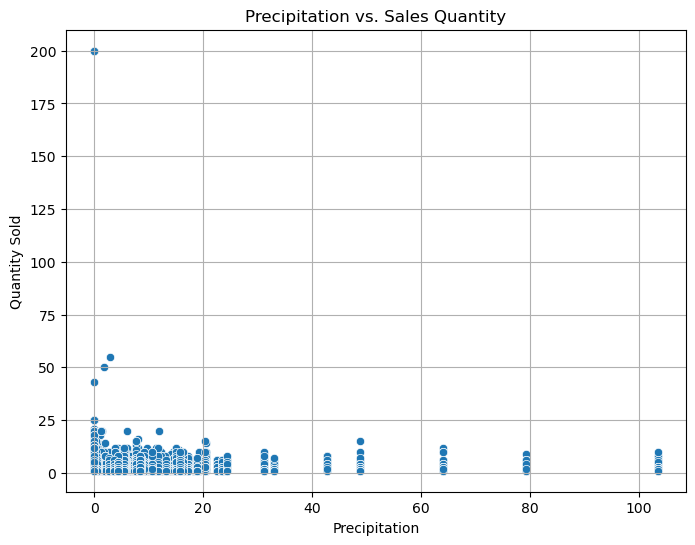

In [74]:
# Scatter plot for precipitation vs. sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='prcp', y='Quantity', data=salesWeather)
plt.title('Precipitation vs. Sales Quantity')
plt.xlabel('Precipitation')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

Now, we want to observe sales w.r.t each day and per article

In [76]:
## only visualisation
# Calculate total_sales by summing across all product columns
salePerArticle = sales.groupby(['date','Article'])['Total_sales(€)','Quantity'].sum().reset_index()
salePerArticle

,date,Article,Total_sales(€),Quantity
0,2021-01-02,BAGUETTE,41.4,46.0
1,2021-01-02,BANETTE,42.0,40.0
2,2021-01-02,BANETTINE,3.6,6.0
3,2021-01-02,BOULE 200G,6.6,6.0
4,2021-01-02,BOULE 400G,16.5,11.0
...,...,...,...,...
29197,2022-09-30,SPECIAL BREAD KG,5.2,1.0
29198,2022-09-30,SUCETTE,0.3,1.0
29199,2022-09-30,TARTELETTE,6.6,3.0
29200,2022-09-30,TRADITIONAL BAGUETTE,183.3,141.0


### Sale over time
We can see that sale increased in the year 2022 from July to September and decreasing down further October onwards.
Similar trend was also seen in 2021. Hece we can conclude that the sale is seasonal and especially around July to september its highest.

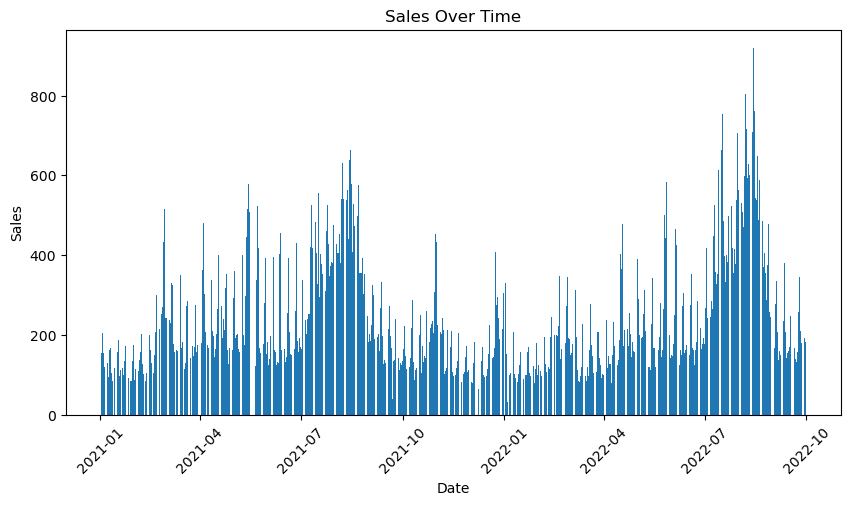

In [123]:
# Plotting
plt.figure(figsize=(10, 5))
plt.bar(salePerArticle['date'], salePerArticle['Total_sales(€)'])

# Rotate the x-axis labels           
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')

# Show plot
plt.show()

Highest sale is 919€ for Traditional baguette which is for the August 2022.

In [79]:
salePerArticle[salePerArticle['Total_sales(€)']==salePerArticle['Total_sales(€)'].max()]

,date,Article,Total_sales(€),Quantity
26942,2022-08-14,TRADITIONAL BAGUETTE,919.1,707.0


Lowest sale are for the following items which is 0€.

In [80]:
salePerArticle[salePerArticle['Total_sales(€)']==salePerArticle['Total_sales(€)'].min()]

,date,Article,Total_sales(€),Quantity
15,2021-01-02,DIVERS PATISSERIE,0.0,1.0
1710,2021-02-19,DIVERS BOULANGERIE,0.0,1.0
2241,2021-03-04,.,0.0,2.0
2320,2021-03-05,GD FAR BRETON,0.0,1.0
2808,2021-03-18,.,0.0,1.0
3538,2021-04-04,.,0.0,1.0
4658,2021-04-27,.,0.0,1.0
5470,2021-05-13,DIVERS CONFISERIE,0.0,1.0
8133,2021-07-10,.,0.0,2.0
9308,2021-07-29,DIVERS CONFISERIE,0.0,1.0


Grouping sales on the date to get sales per day

In [82]:
# Calculate total_sales by summing across all product columns
dailySales = sales.groupby('date')['Total_sales(€)'].sum().reset_index()
dailySales

,date,Total_sales(€)
0,2021-01-02,987.85
1,2021-01-03,1016.10
2,2021-01-04,461.90
3,2021-01-05,536.50
4,2021-01-07,544.00
...,...,...
595,2022-09-26,697.35
596,2022-09-27,791.55
597,2022-09-28,610.70
598,2022-09-29,707.40


Creating dataset sales per day for forecasting sales that would happen in the future.

In [83]:
## Model creation and visualisation
# Merge datasets on date
salesPerDay = pd.merge(dailySales, weather, on='date')
salesPerDay.head()

,date,Total_sales(€),tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-01-02,987.85,1.3,0.5,2.7,0.8,NaN,336.0,24.7,44.0,1010.1,NaN
1,2021-01-03,1016.10,0.7,-0.3,1.6,0.0,NaN,327.0,17.1,38.9,1012.1,NaN
2,2021-01-04,461.90,0.0,-1.0,1.1,0.0,NaN,329.0,10.6,30.0,1011.4,NaN
3,2021-01-05,536.50,0.8,-0.9,2.1,0.0,NaN,338.0,6.2,30.0,1012.1,NaN
4,2021-01-07,544.00,0.2,-1.6,2.5,0.0,NaN,343.0,6.2,24.0,1017.1,NaN


In [84]:
print('Shape of the merged dataset',salesPerDay.shape)

Shape of the merged dataset (600, 12)


**Handling Nan values:**
Filling Nan values:

**Bfill:** backward fill
**Ffill:** forward fill

In [85]:
salesPerDay.fillna(method='bfill', inplace=True)
salesPerDay.fillna(method='ffill', inplace=True)

Minimum and maximum day in the dataset

In [86]:
salesPerDay.date.max()

Timestamp('2022-09-30 00:00:00')

In [87]:
salesPerDay.date.min()

Timestamp('2021-01-02 00:00:00')

**Statistic overview of the data:**

1. Min sales/day: 116.0 
2. Max sales/day: 3184.1
3. Median of sales/day: 769.90


    

In [88]:
 salesPerDay.describe()

,Total_sales(€),tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0000,600.000000,600.000000,600.000000,0.0
mean,944.654250,14.116167,9.695667,19.112500,2.357667,10.921667,230.6200,12.661667,38.751500,1018.181500,NaN
std,479.961217,7.794737,6.976216,8.977724,7.724143,4.357428,108.3571,6.032701,14.243325,7.073294,NaN
min,116.000000,-3.300000,-5.400000,-1.500000,0.000000,10.000000,0.0000,3.100000,11.000000,996.400000,NaN
25%,612.850000,8.100000,4.050000,12.400000,0.000000,10.000000,158.0000,8.000000,28.000000,1013.900000,NaN
50%,769.900000,14.250000,9.800000,19.600000,0.000000,10.000000,218.0000,11.100000,37.000000,1018.150000,NaN
75%,1189.337500,20.725000,15.700000,26.500000,0.800000,10.000000,339.0000,16.000000,46.075000,1021.925000,NaN
max,3184.100000,31.800000,24.800000,38.500000,103.400000,41.000000,359.0000,41.000000,93.000000,1039.300000,NaN


Dropping the column tsun because its empty.

In [89]:
salesPerDay.drop(columns='tsun',inplace =True)

**Sales w.r.t average temperature and snow:**

Sales is higher mostly above 5 degree celcius average temperature of the day with little to no snow.

<Axes: xlabel='tavg', ylabel='Total_sales(€)'>

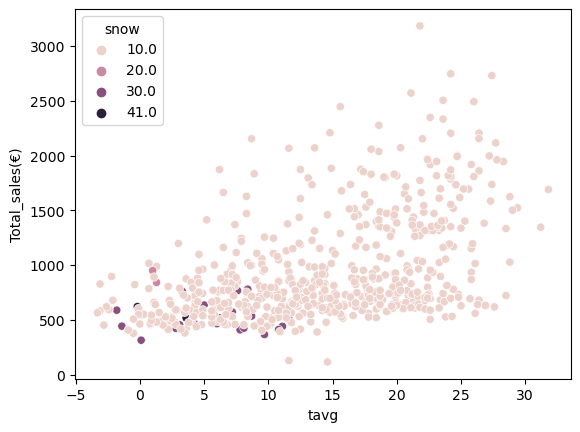

In [91]:
sns.scatterplot(x='tavg',y='Total_sales(€)',hue='snow',data=salesPerDay)

**Sales w.r.t average temperature and wind speed:**

Sales is higher mostly above 5 degree celcius average temperature of the day with wind speed spreaded across.

<Axes: xlabel='tavg', ylabel='Total_sales(€)'>

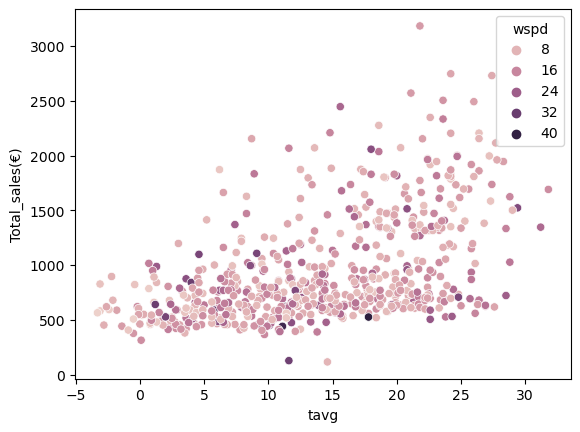

In [92]:
sns.scatterplot(x='tavg',y='Total_sales(€)',hue='wspd',data=salesPerDay)

**Sales w.r.t average temperature and precipitation:**

Maximum sales are happening in 15 to 30 degree temperature with little to no precipitation.

<Axes: xlabel='tavg', ylabel='Total_sales(€)'>

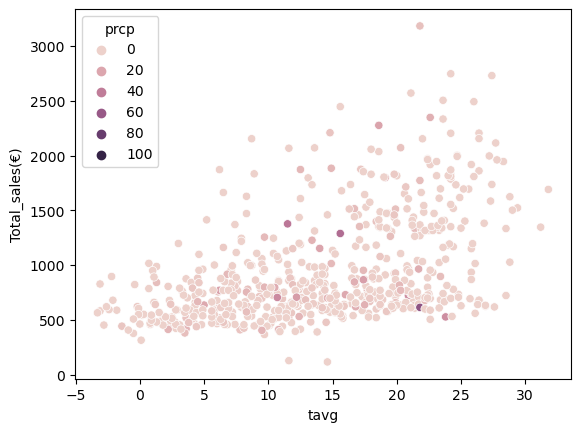

In [93]:
sns.scatterplot(x='tavg',y='Total_sales(€)',hue='prcp',data=salesPerDay)

Resampling data to create time series dataset with frequency as day.

In [94]:
# Ensure the data is uniformly sampled (daily frequency)
startdate=salesPerDay['date'].max()
salesPerDay.set_index('date', inplace=True)
salesPerDay = salesPerDay.asfreq('D')

# Forward fill any remaining missing values after resampling
salesPerDay.fillna(method='ffill', inplace=True)

**Feature engineering:**

Creating lags for 7 days for better u nderstanding of time series model.

In [96]:
# Feature engineering: adding lagged features
salesPerDay['lagged_sales_1'] = salesPerDay['Total_sales(€)'].shift(1)
salesPerDay['lagged_sales_2'] = salesPerDay['Total_sales(€)'].shift(2)
salesPerDay['lagged_sales_3'] = salesPerDay['Total_sales(€)'].shift(3)
salesPerDay['lagged_sales_4'] = salesPerDay['Total_sales(€)'].shift(4)
salesPerDay['lagged_sales_5'] = salesPerDay['Total_sales(€)'].shift(5)
salesPerDay['lagged_sales_6'] = salesPerDay['Total_sales(€)'].shift(6)
salesPerDay['lagged_sales_7'] = salesPerDay['Total_sales(€)'].shift(7)
salesPerDay['lagged_sales_8'] = salesPerDay['Total_sales(€)'].shift(8)
salesPerDay['lagged_sales_9'] = salesPerDay['Total_sales(€)'].shift(9)
salesPerDay['lagged_sales_10'] = salesPerDay['Total_sales(€)'].shift(10)
salesPerDay = salesPerDay.dropna()
salesPerDay


,Total_sales(€),tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,lagged_sales_1,lagged_sales_2,lagged_sales_3,lagged_sales_4,lagged_sales_5,lagged_sales_6,lagged_sales_7,lagged_sales_8,lagged_sales_9,lagged_sales_10
date,,,,,,,,,,,,,,,,,,,,
2021-01-12,376.70,-0.5,-5.1,2.6,0.0,10.0,137.0,12.8,30.0,1024.9,452.55,896.10,679.45,550.50,544.00,536.50,536.50,461.90,1016.10,987.85
2021-01-13,376.70,-0.5,-5.1,2.6,0.0,10.0,137.0,12.8,30.0,1024.9,376.70,452.55,896.10,679.45,550.50,544.00,536.50,536.50,461.90,1016.10
2021-01-14,516.55,6.2,5.0,7.5,9.9,41.0,172.0,10.9,28.0,1021.8,376.70,376.70,452.55,896.10,679.45,550.50,544.00,536.50,536.50,461.90
2021-01-15,517.82,3.6,0.5,7.2,6.1,41.0,319.0,18.7,42.0,1022.0,516.55,376.70,376.70,452.55,896.10,679.45,550.50,544.00,536.50,536.50
2021-01-16,620.65,-0.2,-1.1,1.1,3.3,41.0,10.0,14.9,42.0,1028.7,517.82,516.55,376.70,376.70,452.55,896.10,679.45,550.50,544.00,536.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,697.35,14.8,11.8,18.3,2.8,10.0,297.0,7.8,22.2,1011.3,1152.85,846.45,654.95,593.85,549.05,624.35,1199.70,1199.70,1024.60,696.35
2022-09-27,791.55,13.4,10.7,16.3,3.6,10.0,240.0,10.5,33.0,1008.6,697.35,1152.85,846.45,654.95,593.85,549.05,624.35,1199.70,1199.70,1024.60
2022-09-28,610.70,14.2,11.2,19.2,4.3,10.0,190.0,15.9,48.0,1003.1,791.55,697.35,1152.85,846.45,654.95,593.85,549.05,624.35,1199.70,1199.70


No duplicate values found.

In [ ]:
salesPerDay[salesPerDay.duplicated()]

## Model

Forecasting model has been created on train and test data which later on will be used to predict future trends.

We are using various regression algorithms:

1. Random Forest
2. XG Boost
3. Linear Regression
4. Gradient boosting Regressor

RMSE: 0.08377677868532217
MAE: 0.055256464809667144


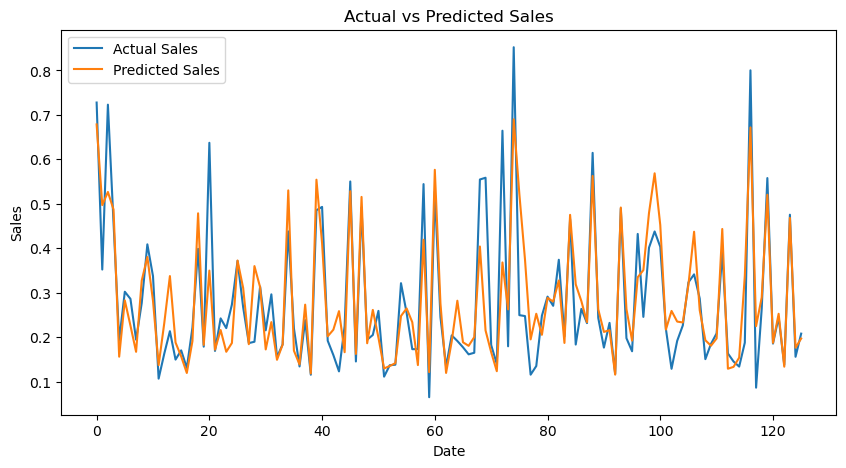

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define features and target variable
X = salesPerDay.drop(columns=['Total_sales(€)'])
y = salesPerDay['Total_sales(€)']

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
r2=r2_score(y_test, y_pred)
print(f'R2 score for Random Forest: {r2}')

R2 score for Random Forest: 0.7242532227868037


Creating data for the next 30 days in the future:

In [100]:
future_dates = pd.date_range(start=startdate + pd.Timedelta(days=1), periods=30)
future_weather = pd.DataFrame({
    'date': future_dates,
    'tavg': np.random.normal(salesPerDay['tavg'].mean(), salesPerDay['tavg'].std(), 30),
    'tmin': np.random.normal(salesPerDay['tmin'].mean(), salesPerDay['tmin'].std(), 30),
    'tmax': np.random.normal(salesPerDay['tmax'].mean(), salesPerDay['tmax'].std(), 30),
    'prcp': np.random.normal(salesPerDay['prcp'].mean(), salesPerDay['prcp'].std(), 30),
    'snow': np.random.normal(salesPerDay['snow'].mean(), salesPerDay['snow'].std(), 30),
    'wdir': np.random.normal(salesPerDay['wdir'].mean(), salesPerDay['wdir'].std(), 30),
    'wspd': np.random.normal(salesPerDay['wspd'].mean(), salesPerDay['wspd'].std(), 30),
    'wpgt': np.random.normal(salesPerDay['wpgt'].mean(), salesPerDay['wpgt'].std(), 30),
    'pres': np.random.normal(salesPerDay['pres'].mean(), salesPerDay['pres'].std(), 30)
}).set_index('date')

# Create lagged features for the future data
future_weather['lagged_sales_1'] = salesPerDay['Total_sales(€)'].iloc[-1]
future_weather['lagged_sales_2'] = salesPerDay['Total_sales(€)'].iloc[-2]
future_weather['lagged_sales_3'] = salesPerDay['Total_sales(€)'].iloc[-3]
future_weather['lagged_sales_4'] = salesPerDay['Total_sales(€)'].iloc[-4]
future_weather['lagged_sales_5'] = salesPerDay['Total_sales(€)'].iloc[-5]
future_weather['lagged_sales_6'] = salesPerDay['Total_sales(€)'].iloc[-6]
future_weather['lagged_sales_7'] = salesPerDay['Total_sales(€)'].iloc[-7]
future_weather['lagged_sales_8'] = salesPerDay['Total_sales(€)'].iloc[-8]
future_weather['lagged_sales_9'] = salesPerDay['Total_sales(€)'].iloc[-9]
future_weather['lagged_sales_10'] = salesPerDay['Total_sales(€)'].iloc[-10]



In [101]:
future_weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,lagged_sales_1,lagged_sales_2,lagged_sales_3,lagged_sales_4,lagged_sales_5,lagged_sales_6,lagged_sales_7,lagged_sales_8,lagged_sales_9,lagged_sales_10
date,,,,,,,,,,,,,,,,,,,
2022-10-01,7.222681,-1.190878,9.420710,-5.985851,12.383146,278.331738,6.461703,30.531759,1013.280957,795.95,707.4,610.7,791.55,697.35,1152.85,846.45,654.95,593.85,549.05
2022-10-02,5.283290,8.903975,19.696299,2.723915,21.596160,142.986152,10.859483,17.774197,1001.703833,795.95,707.4,610.7,791.55,697.35,1152.85,846.45,654.95,593.85,549.05
2022-10-03,22.964334,11.934824,20.359270,10.546023,19.861411,267.655282,21.796491,44.974975,1016.234511,795.95,707.4,610.7,791.55,697.35,1152.85,846.45,654.95,593.85,549.05
2022-10-04,19.200153,11.206597,15.742787,-5.323911,12.637953,385.347982,12.364268,54.437119,1017.422590,795.95,707.4,610.7,791.55,697.35,1152.85,846.45,654.95,593.85,549.05
2022-10-05,23.369998,15.205480,31.659969,-2.645649,4.391184,264.713887,11.481837,24.975586,1020.178659,795.95,707.4,610.7,791.55,697.35,1152.85,846.45,654.95,593.85,549.05


In [102]:

# Make predictions for future sales
future_sales = model.predict(future_weather)

# Create a DataFrame for future sales
future_sales_df = pd.DataFrame({
    'date': future_dates,
    'predicted_sales(€)': future_sales
}).set_index('date')


future_sales_df.style


,predicted_sales(€)
date,
2022-10-01 00:00:00,0.645239
2022-10-02 00:00:00,0.703881
2022-10-03 00:00:00,0.703881
2022-10-04 00:00:00,0.696859
2022-10-05 00:00:00,0.696859
2022-10-06 00:00:00,0.703881
2022-10-07 00:00:00,0.703881
2022-10-08 00:00:00,0.696859
2022-10-09 00:00:00,0.696859


RMSE: 0.0918978977742093
MAE: 0.05793485626986906


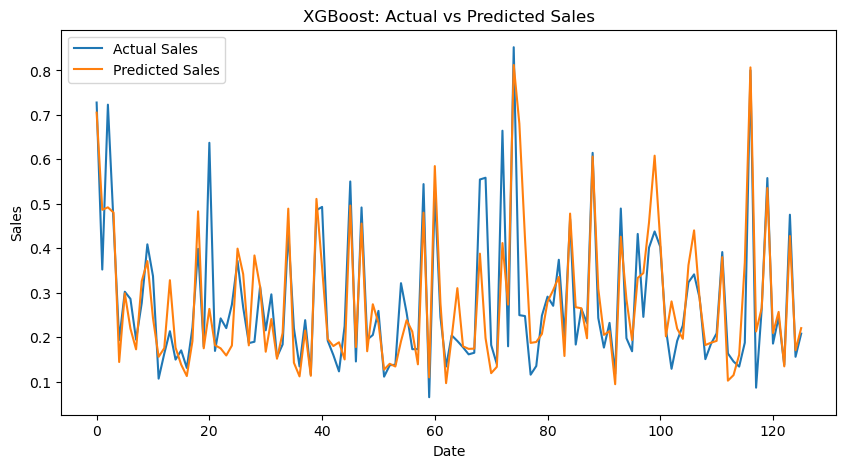

In [103]:
# Initialize and train the model
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('XGBoost: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
r2=r2_score(y_test, y_pred)
print(f'R2 score for XGB: {r2}')

R2 score for XGB: 0.6682016023638914


RMSE: 0.08376187231042696
MAE: 0.058566848514371


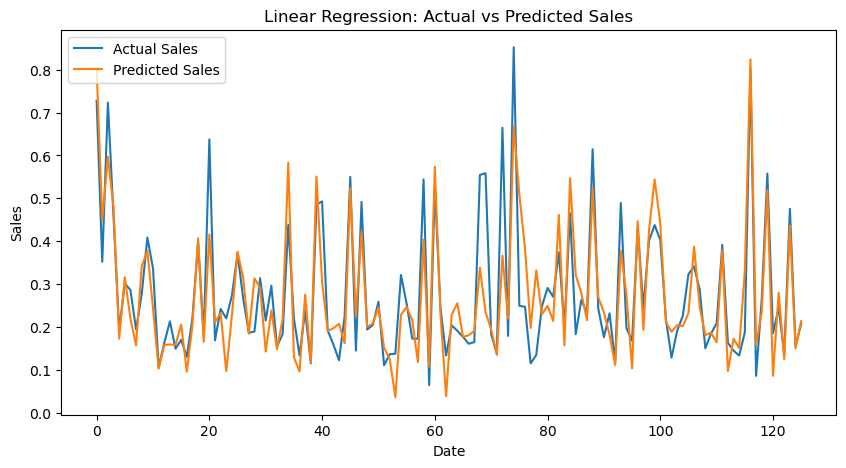

In [105]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
r2=r2_score(y_test, y_pred)
print(f'R2 score for LinearRegression: {r2}')

R2 score for LinearRegression: 0.7243513411251323


RMSE: 0.0818157516094711
MAE: 0.05302423235266203


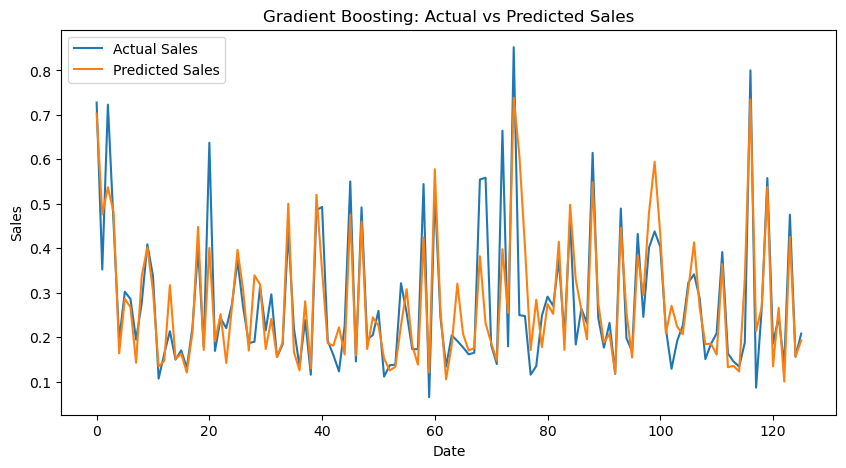

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Gradient Boosting: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
r2=r2_score(y_test, y_pred)
print(f'R2 score for GradientBoostingRegressor: {r2}')

R2 score for GradientBoostingRegressor: 0.7370113657156077


**Hyper parameter tuning:**

We are using hyper parameter tuning for RandomForest to optimise the hyperparameters. For hyperparameter, grid search we are using to create best model ot of it.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message=".*max_features='auto'.*")

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize and perform grid search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)


In [130]:
print(f'Best Parameters: {best_params}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 0.08355712971111022
MAE: 0.05537286383842239


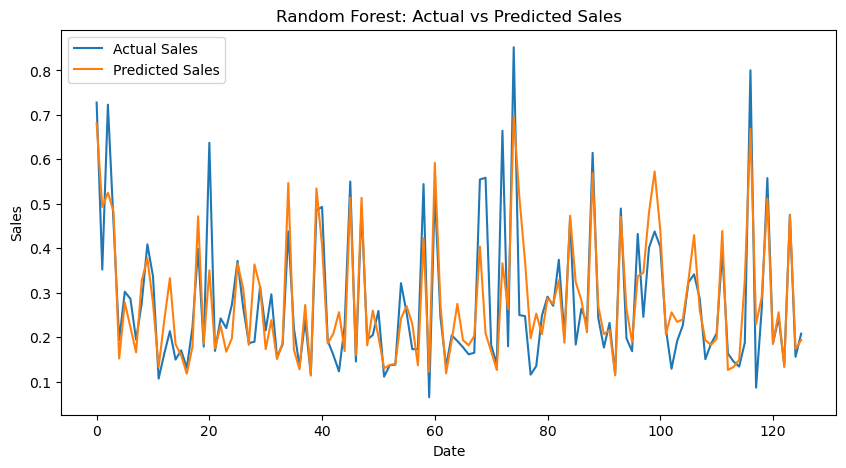

In [114]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Random Forest: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

As we can see that R2 increased to 74% after tuning.

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
r2=r2_score(y_test, y_pred)
print(f'R2 score for RF after tuning: {r2}')

R2 score for RF after tuning: 0.7256972529508818


Predicting next 30 days in future with the model created after hyper parameter tuning

In [116]:
# Make predictions for future sales
future_sales = best_model.predict(future_weather)

# Create a DataFrame for future sales
future_sales_df = pd.DataFrame({
    'date': future_dates,
    'predicted_sales(€)': future_sales
}).set_index('date')


future_sales_df.style


,predicted_sales(€)
date,
2022-10-01 00:00:00,0.622987
2022-10-02 00:00:00,0.671488
2022-10-03 00:00:00,0.671488
2022-10-04 00:00:00,0.664135
2022-10-05 00:00:00,0.664135
2022-10-06 00:00:00,0.671488
2022-10-07 00:00:00,0.671488
2022-10-08 00:00:00,0.664135
2022-10-09 00:00:00,0.664135


## Conclusion

We can conclude that Random Forest and gradient boosting are working well giving accuracy of around 74%.
Had more data be available, accuracy would have gone higher.

1. By looking at the future sales the bakery can predict how much sale is gonna happen in near future and can make items accordingly. Also, visualisations has been provided the information upon how the weather will impact future sales which has already been explained above the respective graphs.

2. Sale around temperature, precipitation, windspeed has been observed in the graphs.

Hence we can say that weather plays an important role around the sales of the bakery and the bakery can save alot of money and food wastage if its gonna follow the business solutions provided by us.
